# 例子:5层神经网络+正则化

In [2]:
import tensorflow as tf

In [4]:
def get_weight(shape,Lambda):
    #生成一个变量
    var = tf.Variable(tf.random_normal(shape),dtype = tf.float32)
    # add_to_collection函数将新生成的变量L2正则化损失项加入集合
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(Lambda)(var))
    return var

In [5]:
x = tf.placeholder(tf.float32,shape=(None,2))
y_ = tf.placeholder(tf.float32,shape = (None,1))

In [6]:
batch_size = 8

In [10]:
layer_dimension = [2,10,10,1]#神经网络层数与节点数
n_layer = len(layer_dimension)

In [11]:
#这个变量维护前向传播时最深的节点，开始的时候就是输入层
cur_layer = x

In [12]:
#当前层的节点个数
in_dimension = layer_dimension[0]

In [14]:
for i in range(1,n_layer):
    #layer_dimension[i]为下层节点的个数
    out_dimension = layer_dimension[i]
    weight = get_weight([in_dimension,out_dimension],0.001)
    bias = tf.Variable(tf.constant(0.1,shape = [out_dimension]))
    #使用Relu函数
    cur_layer = tf.nn.relu(tf.matmul(cur_layer,weight)+bias)
    #进入下一层更新节点
    in_dimension = layer_dimension[i]

In [15]:
mse_loss = tf.reduce_mean(tf.square(y_ - cur_layer))

In [17]:
tf.add_to_collection('losses',mse_loss)

In [18]:
loss = tf.add_n(tf.get_collection('losses'))

# Mnist数据

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [26]:
print ("下载中~别催了")
mnist = input_data.read_data_sets('data/', one_hot=True)
print
print (" 类型是 %s" % (type(mnist)))
print (" 训练数据有 %d" % (mnist.train.num_examples))
print (" 测试数据有 %d" % (mnist.test.num_examples))

下载中~别催了
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
 类型是 <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
 训练数据有 55000
 测试数据有 10000


* Mnist数据格式

In [27]:
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
# 28 * 28 * 1
print (" 数据类型 is %s"    % (type(trainimg)))
print (" 标签类型 %s"  % (type(trainlabel)))
print (" 训练集的shape %s"   % (trainimg.shape,))
print (" 训练集的标签的shape %s" % (trainlabel.shape,))
print (" 测试集的shape' is %s"    % (testimg.shape,))
print (" 测试集的标签的shape %s"  % (testlabel.shape,))

# 

 数据类型 is <class 'numpy.ndarray'>
 标签类型 <class 'numpy.ndarray'>
 训练集的shape (55000, 784)
 训练集的标签的shape (55000, 10)
 测试集的shape' is (10000, 784)
 测试集的标签的shape (10000, 10)


42031th 训练数据 标签是 0


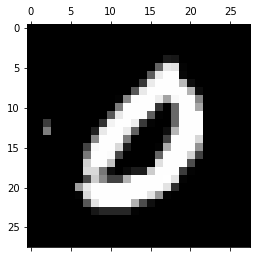

32238th 训练数据 标签是 6


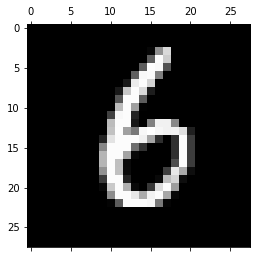

45248th 训练数据 标签是 9


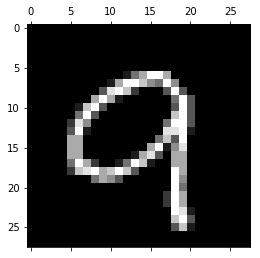

36766th 训练数据 标签是 2


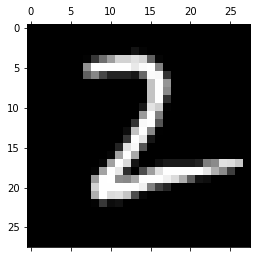

50750th 训练数据 标签是 7


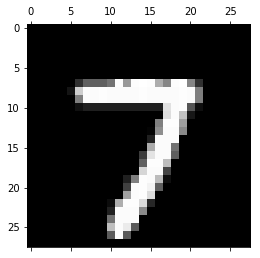

In [28]:
# 看看庐山真面目
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    print ("" + str(i) + "th 训练数据 " 
           + "标签是 " + str(curr_label))
    plt.show()

In [29]:
# Batch数据
print ("Batch Learning? ")
batch_size = 100
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print ("Batch数据 %s" % (type(batch_xs)))
print ("Batch标签 %s" % (type(batch_ys)))
print ("Batch数据的shape %s" % (batch_xs.shape,))
print ("Batch标签的shape %s" % (batch_ys.shape,))

Batch Learning? 
Batch数据 <class 'numpy.ndarray'>
Batch标签 <class 'numpy.ndarray'>
Batch数据的shape (100, 784)
Batch标签的shape (100, 10)


<img src="./img/1.png" alt="FAO" width="790">

## 单层神经网络

<img src="./img/2.png" alt="FAO" width="790">

* 参数设置：

In [33]:
numClasses = 10
batch_size = 100
numHiddenUnits = 50
trainingIterations = 5000
input_Size = 784

In [34]:
X = tf.placeholder(tf.float32,shape=[None,input_Size])
y = tf.placeholder(tf.float32,shape=[None,numClasses])

* 参数初始化

In [44]:
W1 = tf.Variable(tf.truncated_normal([input_Size,numHiddenUnits],stddev=0.1),name='W1')
B1 = tf.Variable(tf.constant(0.1),[numHiddenUnits],name='b1')

W2 = tf.Variable(tf.truncated_normal([numHiddenUnits,numClasses],stddev=0.1),name='W2')
B2 = tf.Variable(tf.constant(0.1),[numClasses],name='b2')

* 网络结构

In [45]:
hiddenLayerOutput = tf.matmul(X, W1) + B1
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)
finalOutput = tf.matmul(hiddenLayerOutput, W2) + B2
finalOutput = tf.nn.relu(finalOutput)

* 网络迭代

In [47]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = finalOutput))
opt = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(loss)

In [48]:
correct_prediction = tf.equal(tf.argmax(finalOutput,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [51]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(trainingIterations):
        batch = mnist.train.next_batch(batch_size)
        batchInput = batch[0]
        batchLabels = batch[1]
        _, trainingLoss = sess.run([opt, loss], feed_dict={X: batchInput, y: batchLabels})
        if i%1000 == 0:
            trainAccuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
            print ("step %d, training accuracy %g"%(i, trainAccuracy))

step 0, training accuracy 0.2
step 1000, training accuracy 0.66
step 2000, training accuracy 0.78
step 3000, training accuracy 0.74
step 4000, training accuracy 0.77


## 两层神经网络：

In [57]:
numHiddenUnitsLayer2 = 100
trainingIterations = 10000

X = tf.placeholder(tf.float32, shape = [None, input_size])
y = tf.placeholder(tf.float32, shape = [None, numClasses])

W1 = tf.Variable(tf.random_normal([input_size, numHiddenUnits], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1), [numHiddenUnits])
W2 = tf.Variable(tf.random_normal([numHiddenUnits, numHiddenUnitsLayer2], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1), [numHiddenUnitsLayer2])
W3 = tf.Variable(tf.random_normal([numHiddenUnitsLayer2, numClasses], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1), [numClasses])

hiddenLayerOutput = tf.matmul(X, W1) + B1
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)
hiddenLayer2Output = tf.matmul(hiddenLayerOutput, W2) + B2
hiddenLayer2Output = tf.nn.relu(hiddenLayer2Output)
finalOutput = tf.matmul(hiddenLayer2Output, W3) + B3

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = finalOutput))
opt = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(loss)

correct_prediction = tf.equal(tf.argmax(finalOutput,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(trainingIterations):
    batch = mnist.train.next_batch(batch_size)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict={X: batchInput, y: batchLabels})
    if i%1000 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
        print ("step %d, training accuracy %g"%(i, train_accuracy))

testInputs = mnist.test.images
testLabels = mnist.test.labels
acc = accuracy.eval(session=sess, feed_dict = {X: testInputs, y: testLabels})
print("testing accuracy: {}".format(acc))

step 0, training accuracy 0.14
step 1000, training accuracy 0.98
step 2000, training accuracy 0.98
step 3000, training accuracy 0.98
step 4000, training accuracy 0.99
step 5000, training accuracy 0.99
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 0.99
step 9000, training accuracy 1
testing accuracy: 0.9699000120162964


## 卷积网络

<img src="./img/3.png" alt="FAO" width="690">

In [60]:
tf.reset_default_graph() 
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None, 28,28,1]) #shape of a photo
y_ = tf.placeholder("float", shape = [None, 10]) #shape is always None x number of classes

In [61]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))#shape is filter x filter x input channels x output channels
b_conv1 = tf.Variable(tf.constant(.1, shape = [32])) #shape of the bias just has to match output channels of the filter

<img src="./img/4.png" alt="FAO" width="490">

In [62]:
h_conv1 = tf.nn.conv2d(input=x, filter=W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [63]:
def conv2d(x, W):
    return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [64]:
#Second Conv and Pool Layers
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#First Fully Connected Layer
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

#Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [65]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [66]:
sess.run(tf.global_variables_initializer())

batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print ("step %d, training accuracy %g"%(i, trainAccuracy))
    trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

step 0, training accuracy 0.02
step 100, training accuracy 0.96
step 200, training accuracy 0.96
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.94
